# Air Quality Analysis Ulm 2022

## Business Understanding

In recent years the concerns about polluted environments and the damage caused due to toxic emissions from industries, traffic, and growing population increased. 
Among the most common atmospheric pollutants are **carbon monoxide (CO), nitrogen oxides (NO and NO2), ozone (O3) and particulate matter (PM)**, predominantly fine particulate matter (with aerodynamic diameter ≤ 2.5 μm, PM2.5). These pollutants, at certain established concentration levels, can damage respiratory and cardiovascular systems (Pope et al., 2012).

**About the project airquality and climate data measuring**

> Within the state funding project Zukunftskommune@bw, 5 LoRaWan-capable air monitoring stations from the company Hawadawa (hawadawa.com) were set up at Eselsberg December 2020 in Ulm. These measure ozone, nitrogen oxide and fine dust data, air pressure, humidity. As of 7/12/2021, one more Sensor ("in der Wanne") continues to operate.

> In this dashboard (https://ulm.svc.hawadawa.com) you can view the location of the sensors and the current values (ozone, nitrogen oxide, particulate matter and climate data) and as a diagram the values of the last day, month or year graphically easy to understand. The dashboard also integrates 2 state measuring stations (of the LUBW and the Bavarian LfU).

> In the period from December 2020 - end of December 2021, 5 LoRaWan-enabled Sentience will provide hourly air quality data at these locations on Eselberg:

> Lupferbrücke: Corner of Weinbergweg / In der Wanne on the traffic island.
Fort unterer Eselsberg: Footpath (data delivery only until 6.12.2021)
New residential area Am Weinberg: Mähringer Weg 95 (data delivery only until 6.12.2021)
Allotment garden below Lukaskirche next to playground/soccer field (data delivery only until 6.12.2021)
REWE Bunk storefront Trollingerweg 2 (data delivery only until 6.12.2021)

Source: https://www.zukunftsstadt-ulm.de/eselsberg/luft-und-klimamessungen

### Relevant Imports

In [1]:
import urllib
import pandas as pd
from pandas import json_normalize
from pandasql import sqldf
import json
import pprint
import matplotlib.pyplot as plt
import seaborn as sns

### Extract data from API

In [3]:
# get HTTP Response from url
url = 'https://datenhub.ulm.de/ckan/api/3/action/datastore_search?resource_id=b49de35e-040c-4530-9208-eefadc97b610&limit=206725'  
response = urllib.request.urlopen(url)
assert response.code == 200

In [4]:
# convert HTTP Response to json
string = response.read().decode('utf-8')
response_dict = json.loads(string)
assert response_dict['success'] is True

In [5]:
# convert JSON object to dataframe
created_package = response_dict['result']
df = pd.DataFrame.from_dict(created_package['records'])

In [6]:
# remove \r\n from string conversion
df = df.replace({r'\r\n': ''}, regex=True)

## Data Understanding

#### Description of the dataset

- station: Location of the measuring sensor<br>
- schadstoff: air pollutant<br>
- zeit_utc: timestamp at the end of the measure<br>
- wert: measurement in µg/m³ <br>

*Schadstoff* explaination:
- NO2: nitrogen dioxide
- O3: ozone
- PM2.5: particulate matter with aerodynamic diameter ≤ 2,5µm
- PM10: particulate matter with aerodynamic diameter ≤ 10µm<br>


##### General information about air pollutants
##### NO2
Nitrogen oxides are by-products of combustion processes. Under solar irradiation, they are decisive for the formation of ground-level ozone and are also a source of particulate matter.

- **Main sources:** Road traffic, furnaces, solvents, agriculture.
- **Health effects:** Irritates and constricts bronchial tubes, intensifies lung disease, increases risk of
diabetes and cardiovascular disease
- **Affected risk groups:** People with lung disease or increased cardiovascular risk, children, seniors, outdoor
active outdoors
- **Effects on the Environment:** Impaired plant growth, overfertilization and acidification of soils and water bodies)
- **Limit values hourly mean:** 200μg/m (EU and WHO limit).
- **Annual average:** 40μg/m (EU and WHO limit)

##### O3
Ozone is a colorless, toxic gas. Near the ground, it is formed from nitrogen oxides and other volatile organic compounds by photochemical processes in the presence of sunlight. and other volatile organic compounds.

- **Main sources:** Road traffic, combustion plants, solvents, agriculture.
- **Health effects:** Damage to the lungs, intensification of asthma symptoms or other lung diseases, irritation of the respiratory tract
- **Affected risk groups:** People with lung diseases, children, seniors, people active outdoors.
- **Effects on the Environment:** Impaired plant growth, quality and quantity of agricultural products.
- **Limits:** 8h hourly average: 120μg/m (EU target value), 8h hourly average: 100μg/m (WHO limit)

##### PM10
PM includes all solid and liquid particles of different chemical compositions with a diameter of less than
than 10 μm.

- **Main sources:** Road transport, power plants, residential furnaces/heaters, metal production, agriculture,
Soil erosion.
- **Health effects:** Depending on their size, particles penetrate into the nasal cavity, bronchial tubes or the bloodstream and damage the tissue
- **Affected risk groups:** Persons at increased risk for pulmonary, cardiovascular disease or diabetes, children,
seniors, people active outdoors
- **Limits:** 24-hour average: 50 μg/m (EU and WHO limit), Annual mean: 40 μg/m (EU limit), Annual mean: 20 μg/m (WHO limit)

##### PM2.5
PM includes all solid and liquid particles of different chemical compositions with a diameter of less than
than 2.5 μm.

- **Main sources:** Road transport, power plants, residential furnaces/heaters, metal production, agriculture, soil erosion
- **Effects on Health:** Depending on size, particles penetrate into nasal cavity, bronchial tubes, or bloodstream and damage tissue
- **Affected risk groups:** Persons at increased risk of pulmonary, cardiovascular disease or diabetes, children, senior citizens, persons active outdoors
- **Limits:** 24-hour average: 25 μg/m (WHO limit), Annual mean: 25 μg/m (EU limit), Annual mean: 10 μg/m (WHO limit)

Source: Landesamt für Umwelt Bayern und Landesamt für Umwelt Baden Württemberg, Luftqualitätsmessnetzdaten

#### Data description

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206725 entries, 0 to 206724
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _id         206725 non-null  int64  
 1   station     206725 non-null  object 
 2   schadstoff  206725 non-null  object 
 3   zeit_utc    206725 non-null  object 
 4   wert        206725 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ MB


In [10]:
df["station"].value_counts()

Ulm in der Wanne                 60710
Ulm Trollingerweg 2              38012
Ulm Spielplatz Sonnenhalde       37310
Ulm Spielplatz Eselsberg Fort    37121
Ulm Maehringer Weg 95            33572
Name: station, dtype: int64

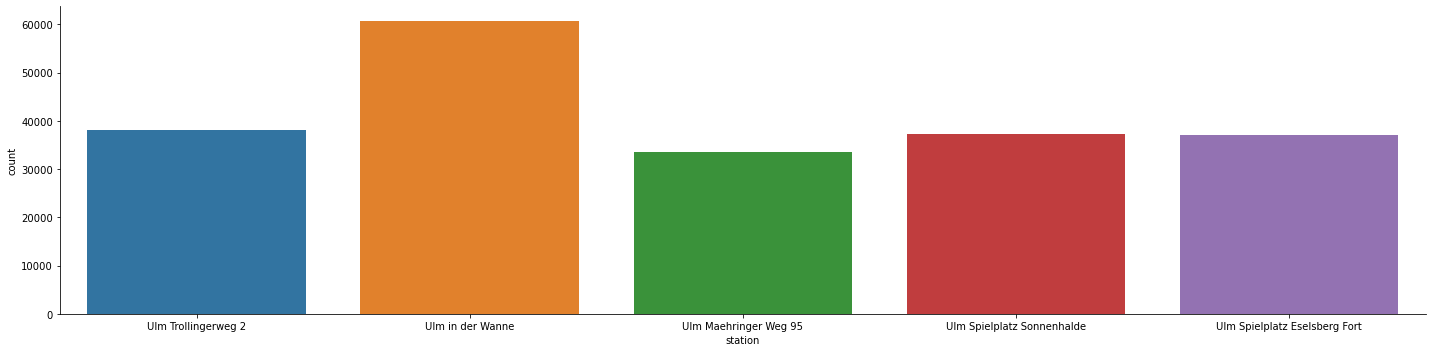

In [11]:
sns.catplot(x = "station", kind = "count",  data = df, height=5, aspect = 4)

Since all sensors except "in the tub" were dismantled, more measured values are available from this location here.

## Data Preperation

In [12]:
df['zeit_utc'] = df['zeit_utc'].replace({r'T': ' '}, regex=True)
df['zeit_utc'] = pd.to_datetime(df['zeit_utc'])

# separate date and time values
df['date'] = [d.date() for d in df['zeit_utc']]
df['time'] = df['zeit_utc'].dt.strftime('%H')
df.drop('zeit_utc', axis=1, inplace=True)
df

,_id,station,schadstoff,wert,date,time
0,1,Ulm Trollingerweg 2,NO2,33.0,2020-11-13,01
1,2,Ulm Trollingerweg 2,O3,0.0,2020-11-13,01
2,3,Ulm Trollingerweg 2,PM10,26.0,2020-11-13,01
3,4,Ulm in der Wanne,PM10,22.0,2020-11-13,01
4,5,Ulm Trollingerweg 2,PM2.5,15.0,2020-11-13,01
...,...,...,...,...,...,...
206720,206721,Ulm in der Wanne,PM2.5,8.0,2022-08-11,15
206721,206722,Ulm in der Wanne,NO2,34.0,2022-08-11,16
206722,206723,Ulm in der Wanne,O3,99.0,2022-08-11,16
206723,206724,Ulm in der Wanne,PM10,24.0,2022-08-11,16


In [13]:
print("Date range:")
query = "SELECT MIN(date), MAX(date) FROM df"
sqldf(query, globals())

Date range:


,MIN(date),MAX(date)
0,2020-11-13,2022-08-11


#### Prepare schadstoffe / pollutants

In [14]:
df2 = df
df2['NO2'] = ""
df2['O3'] = ""
df2['PM10'] = ""
df2['PM2.5'] = ""

,_id,station,schadstoff,wert,date,time,NO2,O3,PM10,PM2.5
0,1,Ulm Trollingerweg 2,NO2,33.0,2020-11-13,01,,,,
1,2,Ulm Trollingerweg 2,O3,0.0,2020-11-13,01,,,,
2,3,Ulm Trollingerweg 2,PM10,26.0,2020-11-13,01,,,,
3,4,Ulm in der Wanne,PM10,22.0,2020-11-13,01,,,,
4,5,Ulm Trollingerweg 2,PM2.5,15.0,2020-11-13,01,,,,
...,...,...,...,...,...,...,...,...,...,...
206720,206721,Ulm in der Wanne,PM2.5,8.0,2022-08-11,15,,,,
206721,206722,Ulm in der Wanne,NO2,34.0,2022-08-11,16,,,,
206722,206723,Ulm in der Wanne,O3,99.0,2022-08-11,16,,,,
206723,206724,Ulm in der Wanne,PM10,24.0,2022-08-11,16,,,,


In [15]:
df2['NO2'] = df.apply(lambda x: x['wert'] if x['schadstoff'] == 'NO2' else '', axis=1)
df2['O3'] = df.apply(lambda x: x['wert'] if x['schadstoff'] == 'O3' else '', axis=1)
df2['PM10'] = df.apply(lambda x: x['wert'] if x['schadstoff'] == 'PM10' else '', axis=1)
df2['PM2.5'] = df.apply(lambda x: x['wert'] if x['schadstoff'] == 'PM2.5' else '', axis=1)

df2.drop('schadstoff', axis=1, inplace=True)
df2.drop('wert', axis=1, inplace=True)

In [16]:
query = """
SELECT _id, station, date, time, SUM(NO2) as NO2, SUM(O3) as O3, SUM(PM10) as PM10, SUM("PM2.5") as "PM2.5"
FROM df
GROUP BY station, date, time
ORDER BY _id ASC
"""
df3 = sqldf(query, globals())
df3

,_id,station,date,time,NO2,O3,PM10,PM2.5
0,1,Ulm Trollingerweg 2,2020-11-13,01,33.0,0.0,26.0,15.0
1,4,Ulm in der Wanne,2020-11-13,01,23.0,0.0,22.0,9.0
2,8,Ulm Maehringer Weg 95,2020-11-13,01,23.0,2.0,20.0,14.0
3,11,Ulm Spielplatz Sonnenhalde,2020-11-13,01,24.0,0.0,28.0,14.0
4,15,Ulm Spielplatz Eselsberg Fort,2020-11-13,01,24.0,0.0,20.0,15.0
...,...,...,...,...,...,...,...,...
51492,206706,Ulm in der Wanne,2022-08-11,12,31.0,91.0,18.0,8.0
51493,206710,Ulm in der Wanne,2022-08-11,13,31.0,93.0,19.0,8.0
51494,206714,Ulm in der Wanne,2022-08-11,14,36.0,98.0,22.0,8.0
51495,206718,Ulm in der Wanne,2022-08-11,15,36.0,100.0,22.0,8.0


## EDA

In [17]:
# Measurement locations
query = "SELECT DISTINCT station FROM df"
sqldf(query, globals())

,station
0,Ulm Trollingerweg 2
1,Ulm in der Wanne
2,Ulm Maehringer Weg 95
3,Ulm Spielplatz Sonnenhalde
4,Ulm Spielplatz Eselsberg Fort


In [18]:
df3.describe()

,_id,NO2,O3,PM10,PM2.5
count,51497.000000,51497.000000,51497.000000,51497.000000,51497.000000
mean,102484.370604,22.794668,34.036934,16.890052,10.480533
std,59605.540627,9.939153,23.332659,10.585981,8.125877
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,50830.000000,15.000000,16.000000,10.000000,5.000000
50%,102139.000000,20.000000,32.000000,15.000000,9.000000
75%,155196.000000,28.000000,48.000000,22.000000,14.000000
max,206722.000000,122.000000,246.000000,113.000000,93.000000


### Verteilung der Schadstoffe nach Station // TODO

In [19]:
query = """
SELECT station, AVG(NO2) as NO2_avg, AVG(O3) as O3_avg, AVG(PM10) as PM10_avg, AVG("PM2.5") as "PM2.5_avg"
FROM df 
GROUP BY station 
"""
sqldf(query, globals())

,station,NO2_avg,O3_avg,PM10_avg,PM2.5_avg
0,Ulm Maehringer Weg 95,5.363338,6.904355,4.088496,2.602705
1,Ulm Spielplatz Eselsberg Fort,4.519867,9.785108,3.803885,2.431319
2,Ulm Spielplatz Sonnenhalde,5.218011,8.562798,4.550335,2.966122
3,Ulm Trollingerweg 2,5.001052,8.455725,4.096391,2.532358
4,Ulm in der Wanne,7.267880,8.513869,4.378834,2.555740


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

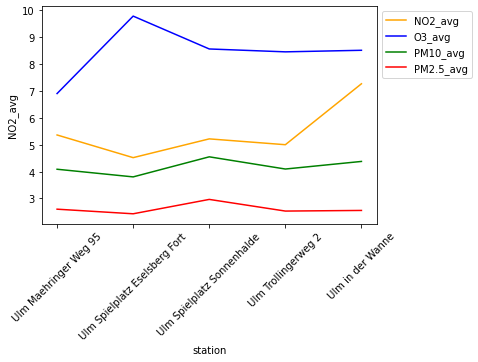

In [20]:
query = """
SELECT station, AVG(NO2) as NO2_avg, AVG(O3) as O3_avg, AVG(PM10) as PM10_avg, AVG("PM2.5") as "PM2.5_avg"
FROM df
GROUP BY station
"""
data = sqldf(query, globals())


sns.lineplot(x = 'station', y = 'NO2_avg', data = data, color = 'orange')
sns.lineplot(x = 'station', y = 'O3_avg', data = data, color = 'blue')
sns.lineplot(x = 'station', y = 'PM10_avg', data = data, color = 'green')
sns.lineplot(x = 'station', y = 'PM2.5_avg', data = data, color = 'red')
plt.legend(labels=["NO2_avg","O3_avg", "PM10_avg", "PM2.5_avg"], bbox_to_anchor = (1,1))
plt.xticks(rotation=45)

Daraus lässt sich folgendes schließen:
- NO2: Ulm in der Wanne
- O3: Ulm Spielplatz Eselsberg Fort
- PM10: Ulm Spielplatz Sonnenhalde
- PM2.5: Ulm Spielplatz Sonnenhalde

### 1. Verteilung über Jahr (Betrachtung Saisonalität/Events)

#### NO2 Verteilung

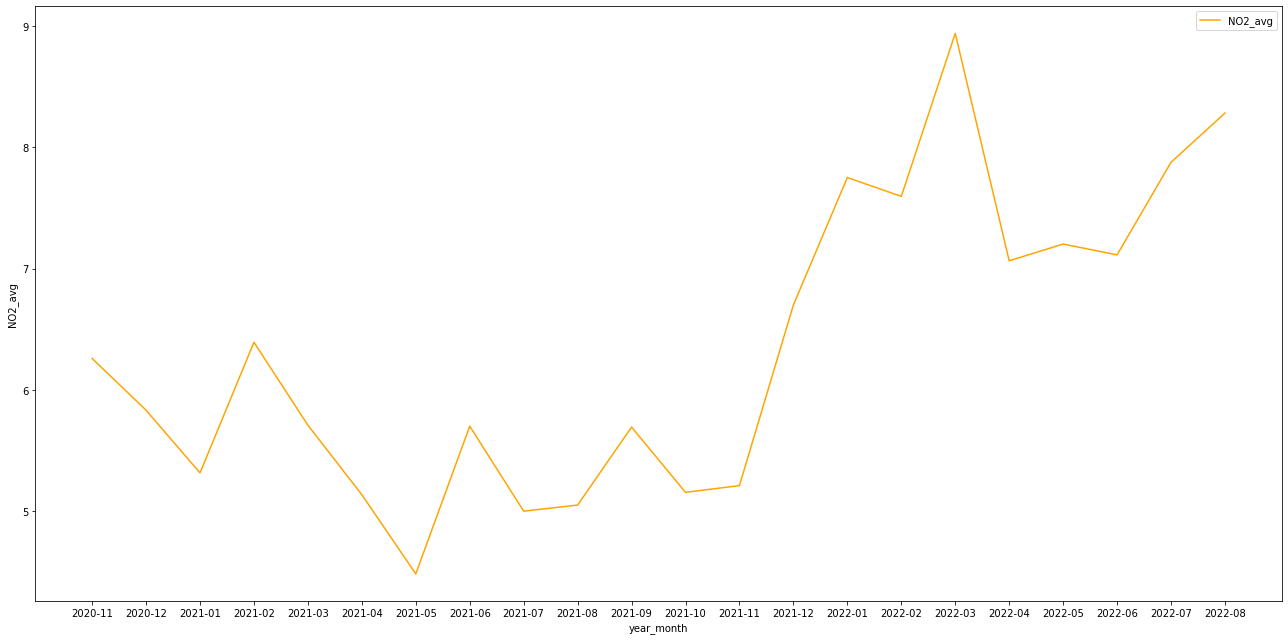

In [21]:
query = """
SELECT AVG(NO2) as NO2_avg, strftime('%Y-%m', date) year_month
FROM df
GROUP BY year_month
ORDER BY year_month ASC
"""
data = sqldf(query, globals())

plt.figure(figsize=(18,9))
sns.lineplot(data=data, x='year_month', y='NO2_avg', color='orange')
#plt.set(title='Schadstoff daily AVG')
plt.legend(labels=["NO2_avg"])
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'NO2 Verteilung nach Station')]

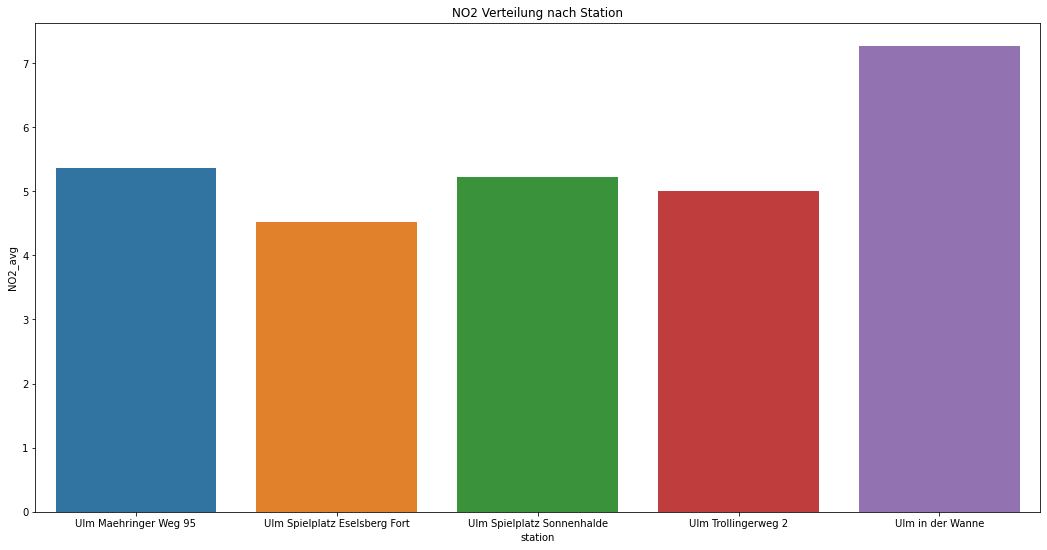

In [22]:
query = """
SELECT station, AVG(NO2) as NO2_avg
FROM df
GROUP BY station
"""
data = sqldf(query, globals())

plt.figure(figsize=(18,9))
sns.barplot(x='station', y='NO2_avg', data=data).set(title='NO2 Verteilung nach Station')

#### 03 Verteilung

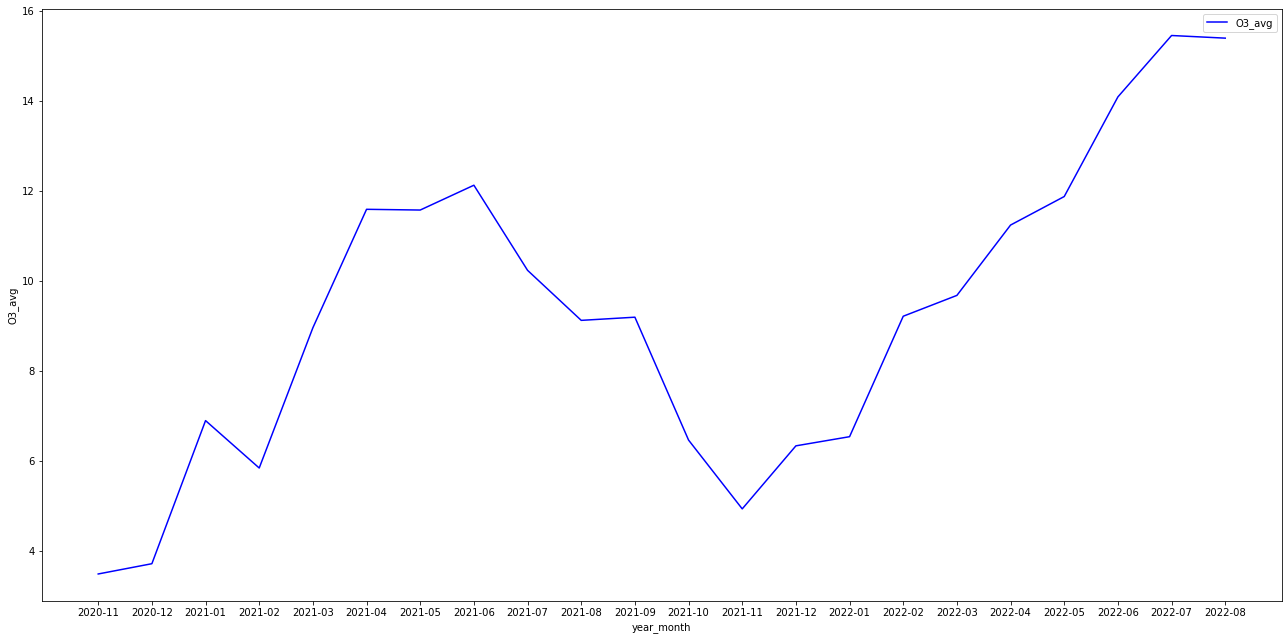

In [23]:
query = """
SELECT AVG(O3) as O3_avg, strftime('%Y-%m', date) year_month
FROM df
GROUP BY year_month
ORDER BY year_month ASC
"""
data = sqldf(query, globals())

plt.figure(figsize=(18,9))
sns.lineplot(data=data, x='year_month', y='O3_avg', color='blue')
#plt.set(title='Schadstoff daily AVG')
plt.legend(labels=["O3_avg"])
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'O3 Verteilung nach Station')]

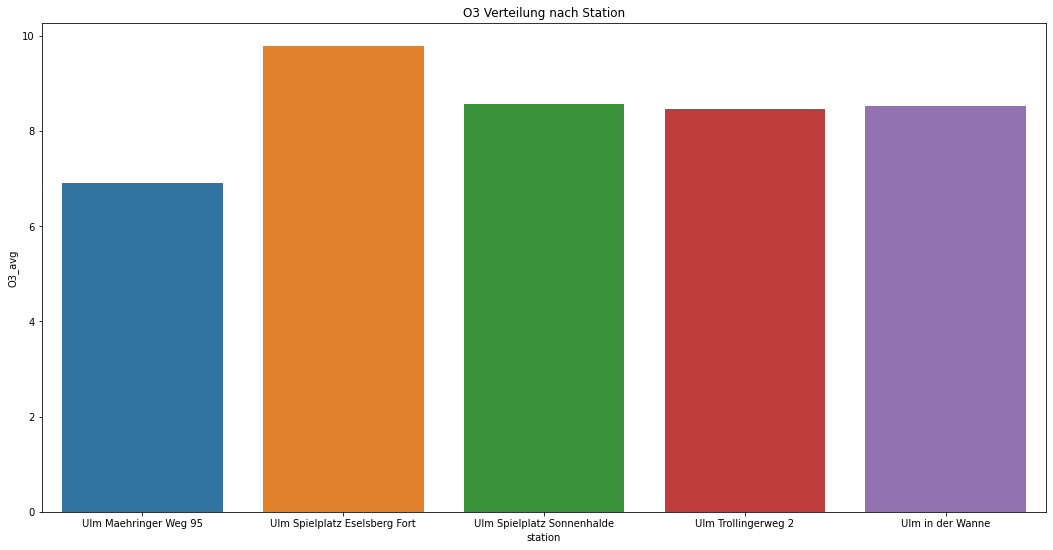

In [24]:
query = """
SELECT station, AVG(O3) as O3_avg
FROM df
GROUP BY station
"""
data = sqldf(query, globals())

plt.figure(figsize=(18,9))
sns.barplot(x='station', y='O3_avg', data=data).set(title='O3 Verteilung nach Station')

#### PM10 Verteilung

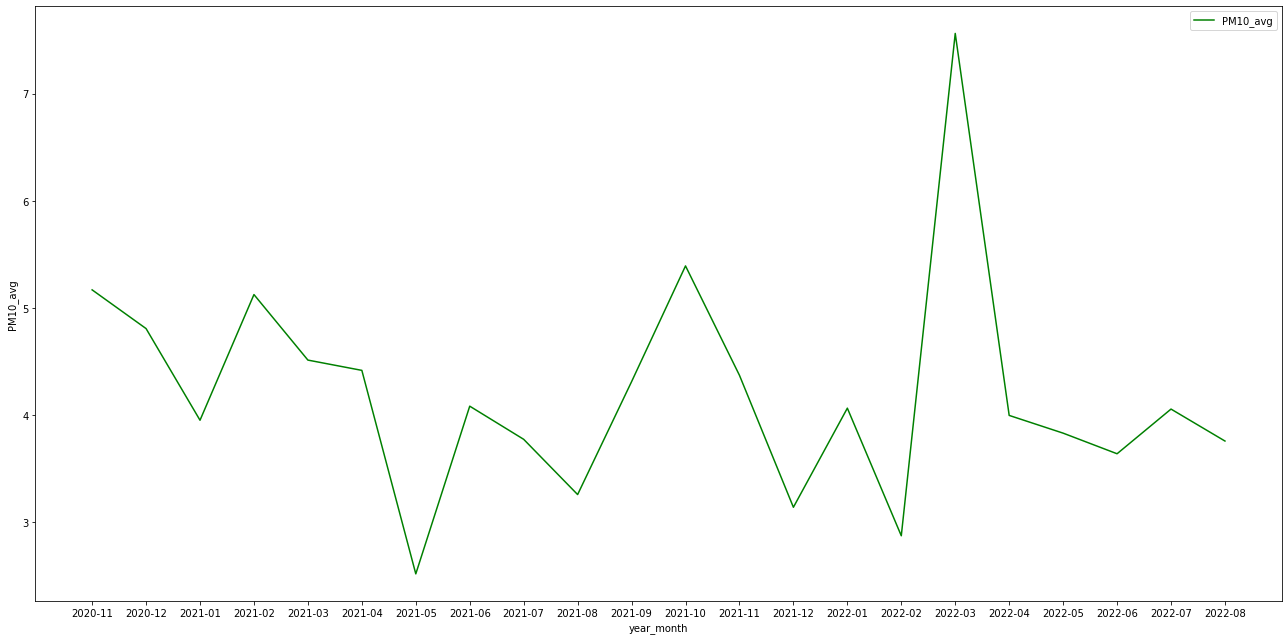

In [25]:
query = """
SELECT AVG("PM10") as "PM10_avg", strftime('%Y-%m', date) year_month
FROM df
GROUP BY year_month
ORDER BY year_month ASC
"""
data = sqldf(query, globals())

plt.figure(figsize=(18,9))
sns.lineplot(data=data, x='year_month', y='PM10_avg', color='green')
#plt.set(title='Schadstoff daily AVG')
plt.legend(labels=["PM10_avg"])
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'PM10 Verteilung nach Station')]

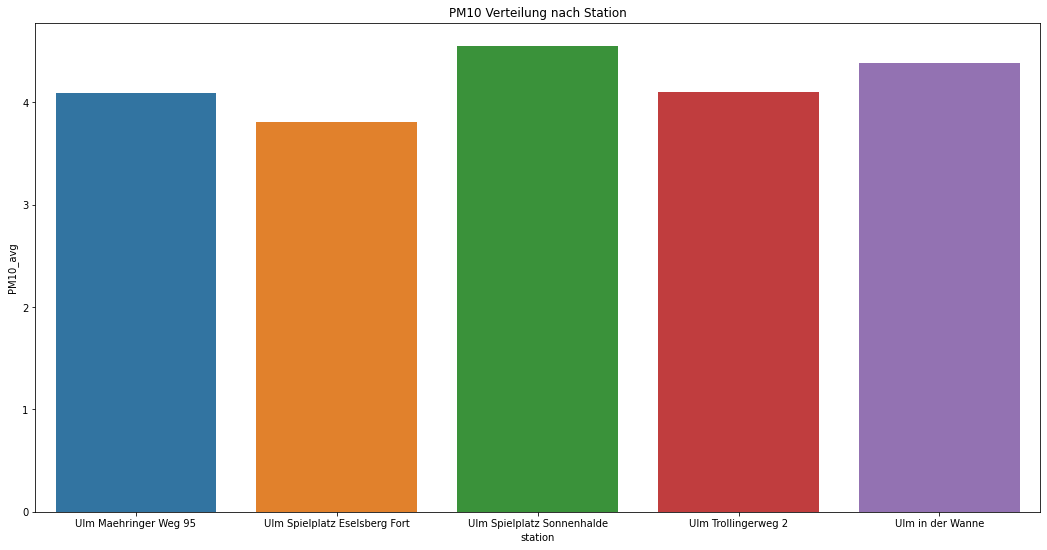

In [26]:
query = """
SELECT station, AVG(PM10) as PM10_avg
FROM df
GROUP BY station
"""
data = sqldf(query, globals())

plt.figure(figsize=(18,9))
sns.barplot(x='station', y='PM10_avg', data=data).set(title='PM10 Verteilung nach Station')

#### PM2.5 Verteilung

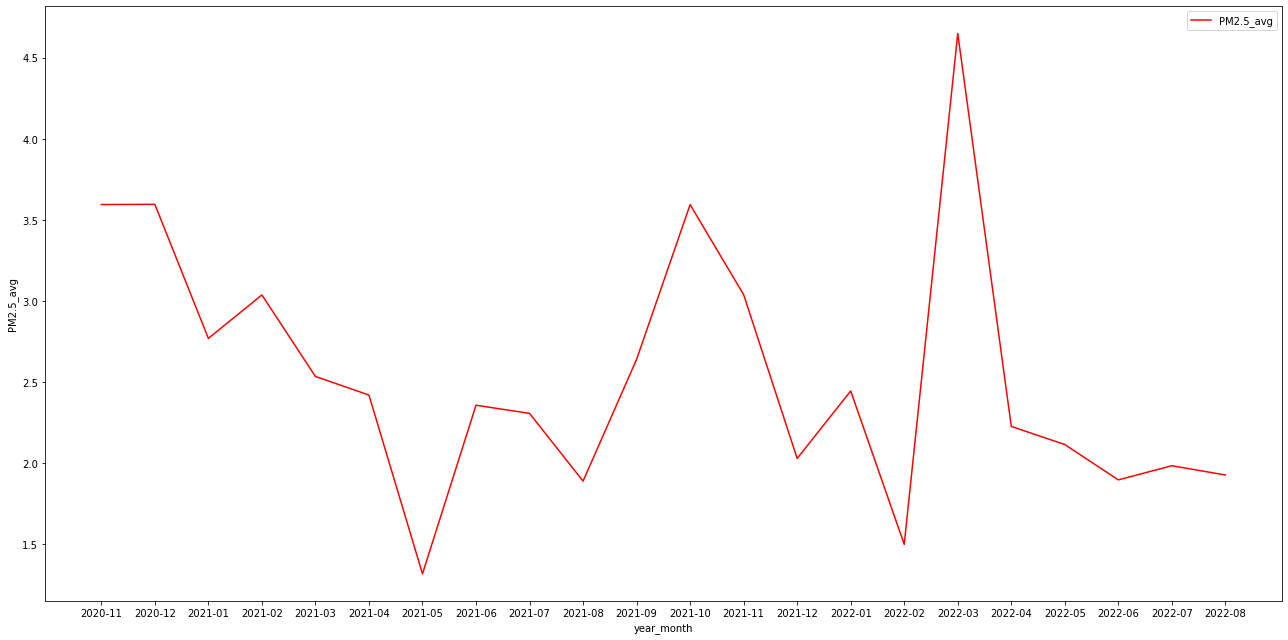

In [27]:
query = """
SELECT AVG("PM2.5") as "PM2.5_avg", strftime('%Y-%m', date) year_month
FROM df
GROUP BY year_month
ORDER BY year_month ASC
"""
data = sqldf(query, globals())

plt.figure(figsize=(18,9))
sns.lineplot(data=data, x='year_month', y='PM2.5_avg', color='red')
#plt.set(title='Schadstoff daily AVG')
plt.legend(labels=["PM2.5_avg"])
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'PM2.5 Verteilung nach Station')]

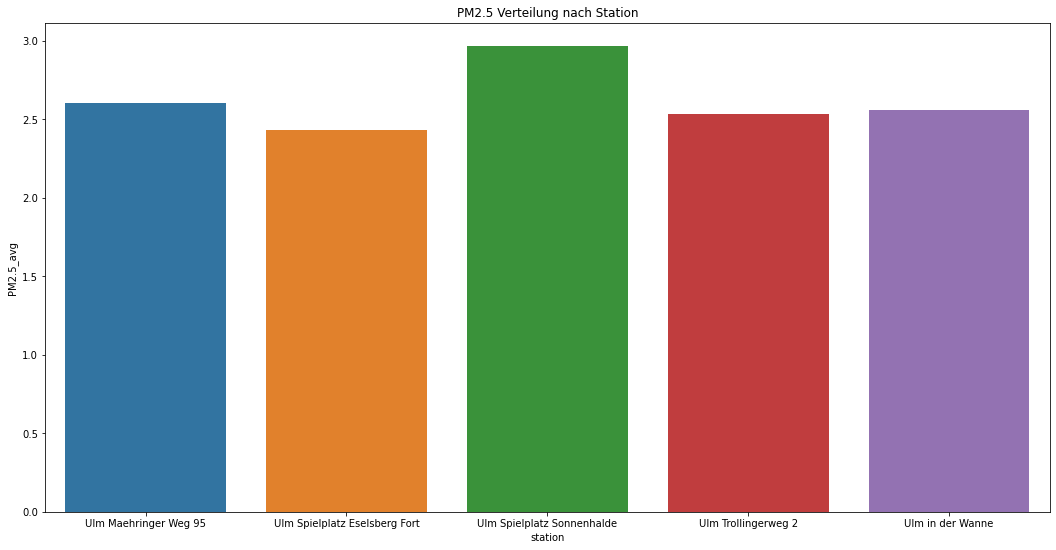

In [28]:
query = """
SELECT station, AVG("PM2.5") as "PM2.5_avg"
FROM df
GROUP BY station
"""
data = sqldf(query, globals())

plt.figure(figsize=(18,9))
sns.barplot(x='station', y='PM2.5_avg', data=data).set(title='PM2.5 Verteilung nach Station')

### 2. Verteilung über Tag (Spitzen durch Berufsverkehr? Welche Station ist am meisten betroffen?) // TODO

#### NO2 // TODO

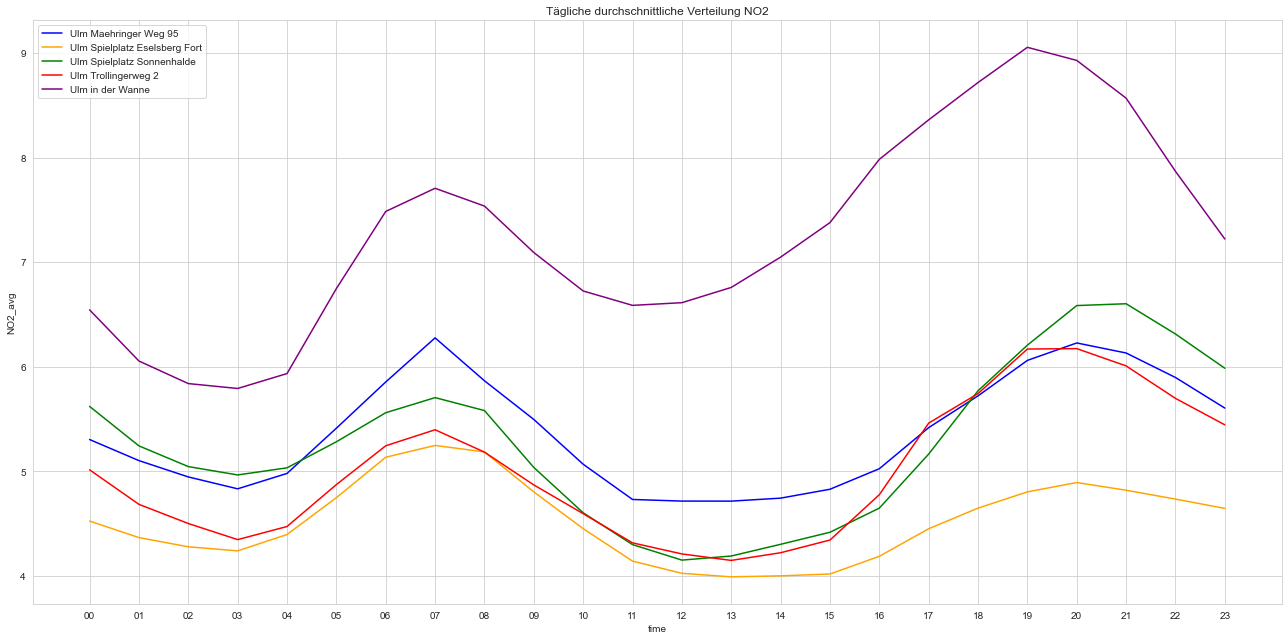

In [29]:
query = """
SELECT station, date, time, AVG(NO2) as NO2_avg
FROM df 
GROUP BY station, date, time
ORDER BY time ASC
"""
data = sqldf(query, globals())

sns.set_style('whitegrid')
plt.figure(figsize=(18,9))

sns.lineplot(data=data[data['station']=='Ulm Maehringer Weg 95'], x='time', y='NO2_avg', color='blue', err_style="bars", ci=0).set(title='Tägliche durchschnittliche Verteilung NO2')
sns.lineplot(data=data[data['station']=='Ulm Spielplatz Eselsberg Fort'], x='time', y='NO2_avg', color='orange', err_style="bars", ci=0)
sns.lineplot(data=data[data['station']=='Ulm Spielplatz Sonnenhalde'], x='time', y='NO2_avg', color='green', err_style="bars", ci=0)
sns.lineplot(data=data[data['station']=='Ulm Trollingerweg 2'], x='time', y='NO2_avg', color='red', err_style="bars", ci=0)
sns.lineplot(data=data[data['station']=='Ulm in der Wanne'], x='time', y='NO2_avg', color='purple', err_style="bars", ci=0)
plt.legend(labels=["Ulm Maehringer Weg 95","Ulm Spielplatz Eselsberg Fort", "Ulm Spielplatz Sonnenhalde", "Ulm Trollingerweg 2", "Ulm in der Wanne"])
plt.tight_layout()
plt.show()

Durchschnittliche NO2 Belastung nach Wochentag?

#### O3

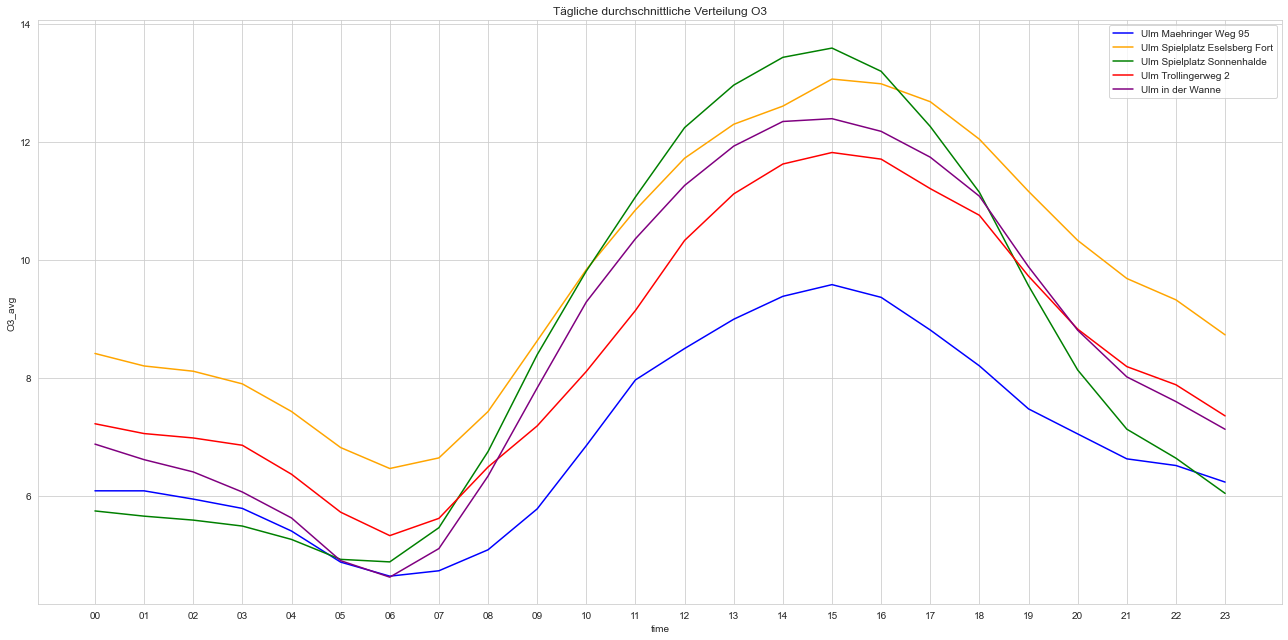

In [30]:
query = """
SELECT station, date, time, AVG(O3) as O3_avg
FROM df 
GROUP BY station, date, time
ORDER BY time ASC
"""
data = sqldf(query, globals())

sns.set_style('whitegrid')
plt.figure(figsize=(18,9))

sns.lineplot(data=data[data['station']=='Ulm Maehringer Weg 95'], x='time', y='O3_avg', color='blue', err_style="bars", ci=0).set(title='Tägliche durchschnittliche Verteilung O3')
sns.lineplot(data=data[data['station']=='Ulm Spielplatz Eselsberg Fort'], x='time', y='O3_avg', color='orange', err_style="bars", ci=0)
sns.lineplot(data=data[data['station']=='Ulm Spielplatz Sonnenhalde'], x='time', y='O3_avg', color='green', err_style="bars", ci=0)
sns.lineplot(data=data[data['station']=='Ulm Trollingerweg 2'], x='time', y='O3_avg', color='red', err_style="bars", ci=0)
sns.lineplot(data=data[data['station']=='Ulm in der Wanne'], x='time', y='O3_avg', color='purple', err_style="bars", ci=0)
plt.legend(labels=["Ulm Maehringer Weg 95","Ulm Spielplatz Eselsberg Fort", "Ulm Spielplatz Sonnenhalde", "Ulm Trollingerweg 2", "Ulm in der Wanne"])
plt.tight_layout()
plt.show()

#### PM10

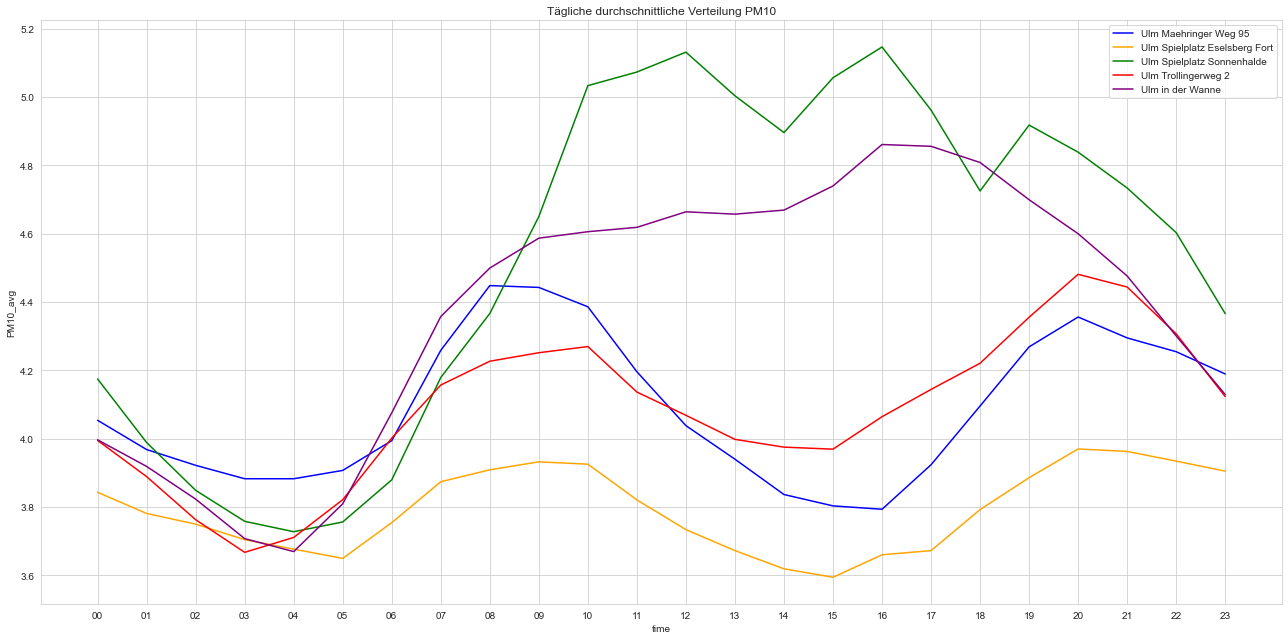

In [31]:
query = """
SELECT station, date, time, AVG(PM10) as PM10_avg
FROM df 
GROUP BY station, date, time
ORDER BY time ASC
"""
data = sqldf(query, globals())

sns.set_style('whitegrid')
plt.figure(figsize=(18,9))

sns.lineplot(data=data[data['station']=='Ulm Maehringer Weg 95'], x='time', y='PM10_avg', color='blue', err_style="bars", ci=0).set(title='Tägliche durchschnittliche Verteilung PM10')
sns.lineplot(data=data[data['station']=='Ulm Spielplatz Eselsberg Fort'], x='time', y='PM10_avg', color='orange', err_style="bars", ci=0)
sns.lineplot(data=data[data['station']=='Ulm Spielplatz Sonnenhalde'], x='time', y='PM10_avg', color='green', err_style="bars", ci=0)
sns.lineplot(data=data[data['station']=='Ulm Trollingerweg 2'], x='time', y='PM10_avg', color='red', err_style="bars", ci=0)
sns.lineplot(data=data[data['station']=='Ulm in der Wanne'], x='time', y='PM10_avg', color='purple', err_style="bars", ci=0)
plt.legend(labels=["Ulm Maehringer Weg 95","Ulm Spielplatz Eselsberg Fort", "Ulm Spielplatz Sonnenhalde", "Ulm Trollingerweg 2", "Ulm in der Wanne"])
plt.tight_layout()
plt.show()

#### PM2.5

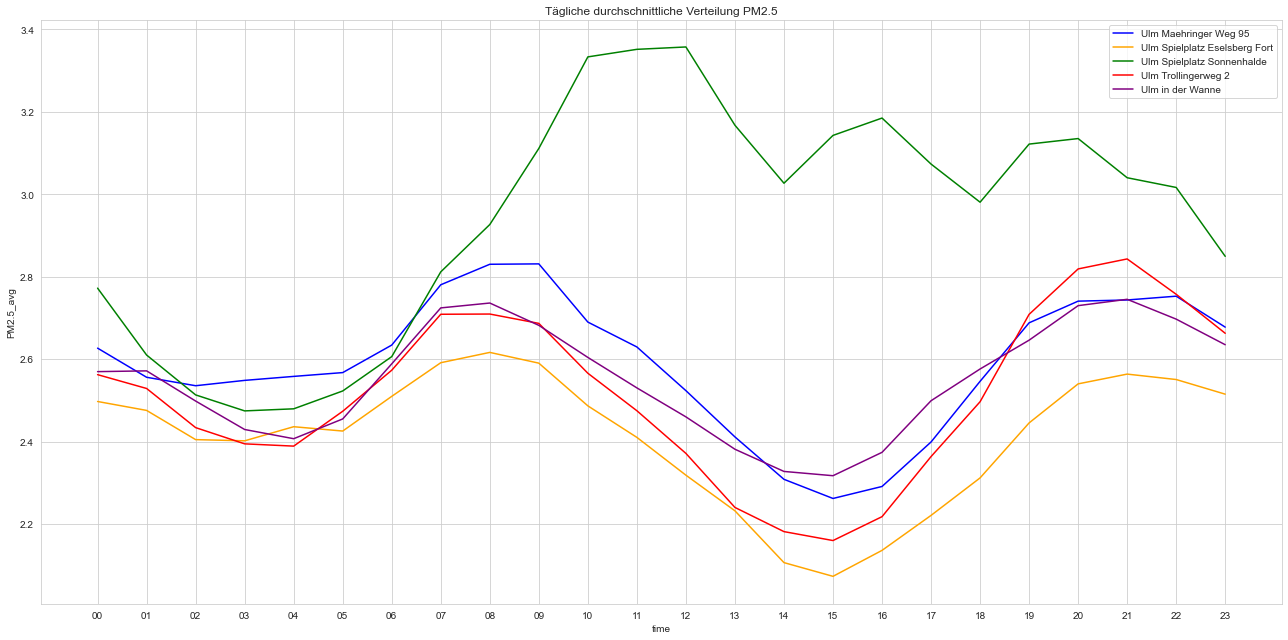

In [32]:
query = """
SELECT station, date, time, AVG("PM2.5") as "PM2.5_avg"
FROM df 
GROUP BY station, date, time
ORDER BY time ASC
"""
data = sqldf(query, globals())

sns.set_style('whitegrid')
plt.figure(figsize=(18,9))

sns.lineplot(data=data[data['station']=='Ulm Maehringer Weg 95'], x='time', y='PM2.5_avg', color='blue', err_style="bars", ci=0).set(title='Tägliche durchschnittliche Verteilung PM2.5')
sns.lineplot(data=data[data['station']=='Ulm Spielplatz Eselsberg Fort'], x='time', y='PM2.5_avg', color='orange', err_style="bars", ci=0)
sns.lineplot(data=data[data['station']=='Ulm Spielplatz Sonnenhalde'], x='time', y='PM2.5_avg', color='green', err_style="bars", ci=0)
sns.lineplot(data=data[data['station']=='Ulm Trollingerweg 2'], x='time', y='PM2.5_avg', color='red', err_style="bars", ci=0)
sns.lineplot(data=data[data['station']=='Ulm in der Wanne'], x='time', y='PM2.5_avg', color='purple', err_style="bars", ci=0)
plt.legend(labels=["Ulm Maehringer Weg 95","Ulm Spielplatz Eselsberg Fort", "Ulm Spielplatz Sonnenhalde", "Ulm Trollingerweg 2", "Ulm in der Wanne"])
plt.tight_layout()
plt.show()

### Verteilung nach Tagen

In [60]:
query = """
select 
    strftime('%W', date) WeekNumber,
    max(date(date, 'weekday 1', '-7 day')) WeekStart,
    max(date(date, 'weekday 1', '-1 day')) WeekEnd,
    count(*) as GroupedValues, 
    AVG(NO2) as NO2_avg, AVG(O3) as O3_avg, AVG(PM10) as PM10_avg, AVG("PM2.5") as "PM2.5_avg"
from df
group by WeekNumber;
"""
data = sqldf(query, globals())
data

,WeekNumber,WeekStart,WeekEnd,GroupedValues,NO2_avg,O3_avg,PM10_avg,PM2.5_avg
0,00,2021-12-27,2022-01-02,1632,4.570466,5.178922,4.952206,3.871936
1,01,2022-01-03,2022-01-09,3995,5.336421,5.008511,4.492866,3.358698
2,02,2022-01-10,2022-01-16,3945,6.151331,6.189861,4.677567,3.189861
3,03,2022-01-17,2022-01-23,3993,6.425244,8.426997,3.146506,1.989732
4,04,2022-01-24,2022-01-30,3851,5.431576,8.385614,3.199169,1.857959
5,05,2022-01-31,2022-02-06,4008,5.749501,5.990269,4.042914,2.668413
6,06,2022-02-07,2022-02-13,3761,6.291944,9.140920,4.764690,2.203137
7,07,2022-02-14,2022-02-20,4005,7.533833,5.227466,4.606242,2.873408
8,08,2022-02-21,2022-02-27,4029,6.737156,5.473070,5.454455,3.263093
9,09,2022-02-28,2022-03-06,3927,6.987013,6.638910,6.291317,3.802394


In [61]:
query = """
select 
    strftime('%W', date) WeekNumber,
    max(date(date, 'weekday 1', '-7 day')) WeekStart,
    max(date(date, 'weekday 1', '-1 day')) WeekEnd,
    count(*) as GroupedValues, 
    AVG(NO2) as NO2_avg, AVG(O3) as O3_avg, AVG(PM10) as PM10_avg, AVG("PM2.5") as "PM2.5_avg"
from df
group by Day;
"""
data = sqldf(query, globals())
data

,WeekNumber,Day,GroupedValues,NO2_avg,O3_avg,PM10_avg,PM2.5_avg
0,45,None,206725,5.67835,8.478897,4.207459,2.610792


KeyError: 'Day'

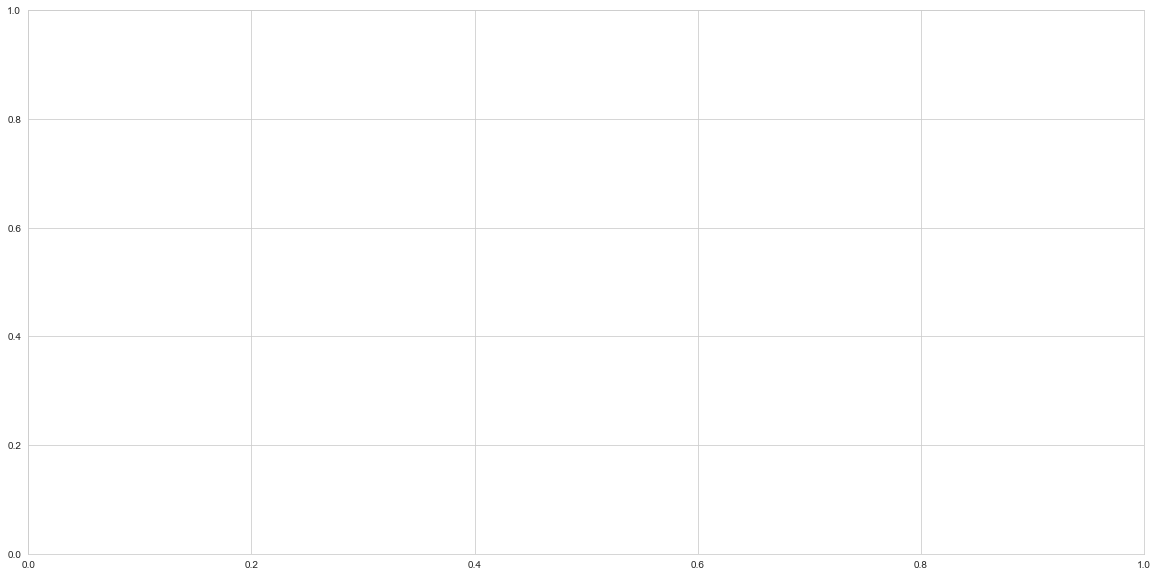

In [46]:
fig, ax = plt.subplots(figsize=(20,10))      
sns.heatmap(data.pivot_table('NO2_avg', index='WeekNumber',columns=['Day'],aggfunc='median',margins=True),ax = ax,annot=True, linewidths=.5)

#### Nach Station:

In [ ]:
query = """
SELECT *, AVG(NO2) as NO2_avg, AVG(O3) as O3_avg, AVG(PM10) as PM10_avg, AVG("PM2.5") as "PM2.5_avg"
FROM df 
WHERE station = "Ulm Spielplatz Eselsberg Fort"
GROUP BY station, date, time
ORDER BY time ASC
"""
data = sqldf(query, globals())

sns.set_style('whitegrid')
plt.figure(figsize=(18,9))
sns.lineplot(data=data, x='time', y='O3_avg', palette='green').set(title='Tägliche Verteilung Ulm Spielplatz Eselsberg Fort')
sns.lineplot(data=data, x='time', y='NO2_avg', palette='blue')
sns.lineplot(data=data, x='time', y='PM10_avg', palette='red')
sns.lineplot(data=data, x='time', y='PM2.5_avg', palette='grey')

plt.legend(labels=["O3_avg","O3_avg","NO2_avg","NO2_avg", "PM10_avg","PM10_avg", "PM2.5_avg","PM2.5_avg"])
plt.tight_layout()
plt.show()

In [ ]:
query = """
SELECT *, AVG(NO2) as NO2_avg, AVG(O3) as O3_avg, AVG(PM10) as PM10_avg, AVG("PM2.5") as "PM2.5_avg"
FROM df 
WHERE station = "Ulm Spielplatz Sonnenhalde"
GROUP BY station, date, time
ORDER BY time ASC
"""
data = sqldf(query, globals())

sns.set_style('whitegrid')
plt.figure(figsize=(18,9))
sns.lineplot(data=data, x='time', y='O3_avg', palette='green').set(title='Tägliche Verteilung Ulm Spielplatz Sonnenhalde')
sns.lineplot(data=data, x='time', y='NO2_avg', palette='blue')
sns.lineplot(data=data, x='time', y='PM10_avg', palette='red')
sns.lineplot(data=data, x='time', y='PM2.5_avg', palette='grey')

plt.legend(labels=["O3_avg","O3_avg","NO2_avg","NO2_avg", "PM10_avg","PM10_avg", "PM2.5_avg","PM2.5_avg"])
plt.tight_layout()
plt.show()

In [ ]:
query = """
SELECT *, AVG(NO2) as NO2_avg, AVG(O3) as O3_avg, AVG(PM10) as PM10_avg, AVG("PM2.5") as "PM2.5_avg"
FROM df 
WHERE station = "Ulm Trollingerweg 2"
GROUP BY station, date, time
ORDER BY time ASC
"""
data = sqldf(query, globals())

sns.set_style('whitegrid')
plt.figure(figsize=(18,9))
sns.lineplot(data=data, x='time', y='O3_avg', palette='green').set(title='Tägliche Verteilung Ulm Trollingerweg 2')
sns.lineplot(data=data, x='time', y='NO2_avg', palette='blue')
sns.lineplot(data=data, x='time', y='PM10_avg', palette='red')
sns.lineplot(data=data, x='time', y='PM2.5_avg', palette='grey')

plt.legend(labels=["O3_avg","O3_avg","NO2_avg","NO2_avg", "PM10_avg","PM10_avg", "PM2.5_avg","PM2.5_avg"])
plt.tight_layout()
plt.show()

In [ ]:
query = """
SELECT *, AVG(NO2) as NO2_avg, AVG(O3) as O3_avg, AVG(PM10) as PM10_avg, AVG("PM2.5") as "PM2.5_avg"
FROM df 
WHERE station = "Ulm in der Wanne"
GROUP BY station, date, time
ORDER BY time ASC
"""
data = sqldf(query, globals())

sns.set_style('whitegrid')
plt.figure(figsize=(18,9))
sns.lineplot(data=data, x='time', y='O3_avg', palette='green').set(title='Tägliche Verteilung Ulm in der Wanne')
sns.lineplot(data=data, x='time', y='NO2_avg', palette='blue')
sns.lineplot(data=data, x='time', y='PM10_avg', palette='red')
sns.lineplot(data=data, x='time', y='PM2.5_avg', palette='grey')

plt.legend(labels=["O3_avg","O3_avg","NO2_avg","NO2_avg", "PM10_avg","PM10_avg", "PM2.5_avg","PM2.5_avg"])
plt.tight_layout()
plt.show()

In [ ]:
query = """
SELECT *, AVG(NO2) as NO2_avg, AVG(O3) as O3_avg, AVG(PM10) as PM10_avg, AVG("PM2.5") as "PM2.5_avg"
FROM df 
WHERE station = "Ulm Maehringer Weg 95"
GROUP BY station, date, time
ORDER BY time ASC
"""
data = sqldf(query, globals())

sns.set_style('whitegrid')
plt.figure(figsize=(18,9))
sns.lineplot(data=data, x='time', y='O3_avg', palette='green').set(title='Tägliche Verteilung Ulm Mähringer Weg 95')
sns.lineplot(data=data, x='time', y='NO2_avg', palette='blue')
sns.lineplot(data=data, x='time', y='PM10_avg', palette='red')
sns.lineplot(data=data, x='time', y='PM2.5_avg', palette='grey')

plt.legend(labels=["O3_avg","O3_avg","NO2_avg","NO2_avg", "PM10_avg","PM10_avg", "PM2.5_avg","PM2.5_avg"])
plt.tight_layout()
plt.show()

### 3. Prediction?

### Evaluation